<a href="https://colab.research.google.com/github/claravetter/mcml_girlsday_2024/blob/main/mcml_girlsday_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MCML Girls Day 2024




## 1. Einführung in Python

Python ist eine Programmiersprache, mit der man viele verschiedene Aufgaben bearbeiten kann. Wir werden heute mit einem Notebook mit mehreren Zellen arbeiten. In der ersten Zelle müssen wir erst ein paar vorprogrammierte Teile *importieren*, um uns den Rest des Workshops einfacher zu machen. Um Eine Zelle auszuführen, kannst du auf *Play* (also den Kreis mit dem Dreieckk drin) drücken. Probier das doch einfach mal für die erste Zelle aus.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
print("Super alle wichtigen Imports sind gemacht")

### Rechnen

Du kannst mit Python Berechungen, wie mit einem Taschenrechner ausführen, z.B. '2 + 3' rechnen.

Probiere gerne andere, schwierigere Rechnungen aus!

In [ ]:
# Wir addieren hier 2 + 3
2 + 3

Kannst du auch schwierige Rechnungen rechnen: Probier doch mal '10-5' und '8+2' aus

In [4]:
# Probiere hier 10-5 und 8+2 aus

Super! Wenn wir jetzt diese Berechnungen gemacht haben wollen wir sie speichern um sie später wieder benutzen zu können. Dafür können wir sogenannte *Variablen* verwenden. Wir können zum Beispiel die Numemr '2' in einer Variable *a* speichern:

In [5]:
a = 2

Um zu sehen was sich jetzt in unser Variable a befindent können wir uns den Wert der in der Variable gespeichert ist mit *print* ausgeben lassen:

In [ ]:
print(a)

Kannst du deine Ergebnisse die Zahlen '3' und '4'  in zwei Variablen *b* und *c* speichern und sie dir dann ausgeben lassen?

In [7]:
# speichere die Zahlen 3 und 4 in jeweils eine Variable b und eine Variable c

Super! Wir können diese Variablen jetzt verwenden um berechnen durchzuführen, z.B. '2+3' ist das selbe wie *a+b* da ja in Variable *a* die Zahl *2* und in Variable *b* die Zahl *3* gespeichert ist. Probiere doch mal aus ob du auch 5 erhältst wenn du a und b addierst:

In [8]:
# Addiere hier a und b.

Super! Zum Schluss wollen wir noch das Maximum, das Minimum un den Mittelwert von 3 Zahlen berechen. Um die 3 Zahlen zusammen verwenden zu können, speichern wir sie in eine Liste. Eine Liste erkennt man an den ekigen Klammern, z.B. [1,2,3] ist eine Liste, die die Zahlen 1,2 und 3 enthält. Um jetzt den Mittelwert zu berechnen, verwenden wir *np.mean()*.

In [ ]:
np.max([1,2,3])
np.min([1,2,3])
np.mean([1,2,3])

Kannst du das Maximum, das Minimum und den Mittelwert von den Zahlen 4,2 und 6 berechen?

In [10]:
# Berechne hier das Maximum, das Minimum und den Mittelwert von 4,2 und 6

Super jetzt hast du die wichtigsten Basics schon gelernt!

**Stop! Sehr gut, du hast den ersten Teil erfolgreich beendet. Jetzt gehts erstmal mit ein paar Folien weiter.**

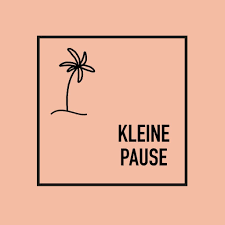

## 2. Brustkrebs Diagnose mit Hilfe von KI

### Brustkrebs-Daten

Jetzt kommen wir zum spannenderen Teil unseres Workshops: Dem Brustkrebst Datensatz. Hierfür laden wir erst den Datensatz. Führe dazu die Zelle unten aus.

In [11]:
breastcancer_data = load_breast_cancer(return_X_y=True, as_frame = True)
feature = breastcancer_data[0]
diagnosen = breastcancer_data[1]

Schauen wir uns die Daten doch mal genauer an. Führe dazu die Zelle unten aus:
Kannst du mit der Ausgabe diese 3 Fragen beantworten:
- Wie viele Instanzen (PatientInnen) sind in dem Datensatz enthalten?
- Wie viele Eigenschaften sind für jede PatientIn in dem Datensatz aufgeführt? Was beschreiben Sie?
- Wie viele PatientInnen haben einen einen gutartigen und einen bösartigen Tumor?

In [ ]:
breastcancer_beschreibung = load_breast_cancer()
beschreibung = breastcancer_beschreibung.DESCR
print(beschreibung)

Abhängig von den Zelleigenschaften (Features), wird eine Diagnose gestellt. Entweder für einen bösartigen oder einen gutartigen Tumor. Die Diagnose wird hier durch 0 oder 1 dargestellt:

In [ ]:
list(np.unique(diagnosen)) #  0 = bösartig, 1 = gutartig

Oben haben wir schon aus der Ausgabe der Beschreibung die Anzahl der Patientinnen und Anzahl der gutartigen und bösartigen Tumore gesucht. Hast du richtig gelegen? Wir können die Anzahl leicht auch in den Daten überprüfen:

In [ ]:
# wie viele Patientendaten haben wir?
anzahl_patienten = len(diagnosen)

# wie viele Patienten haben einen bösartigen Tumor? Wie viele einen gutartigen?
# Wenn das diagnosis = 0 ist, bedeutet das, dass diese Patientin einen
# bösartigen Tumor hat, wenn diagnosis = 1, dann ist der Tumor dieser
# Patientin gutartig

anzahl_bösartig = np.sum(diagnosen == 0)
anzahl_gutartig = np.sum(diagnosen == 1)

print(f'Anzahl Patienten: {anzahl_patienten}')
print(f'Anzahl bösartig: {anzahl_bösartig}')
print(f'Anzahl gutartig: {anzahl_gutartig}')

Jede Patientin in dem Datensatz hat eine einzigartige Id. Mit dem untenstehenden Code können wir herausfinden ob Patientinnen im Datensatz einen gutartigen oder einen bösartigen Tumor hat. Kannst du für Patientin 40, 113,... auch herausfinden ob sie einen gutartigen oder bösartigen Tumor haben?  

In [ ]:
# Hat Patientin 50, 40, 113, .. einen gut- oder bösartigen Tumor?
patientin_id = 50
diagnose = diagnosen[patientin_id-1] # 49, weil in Python bei 0 angefangen wird

if diagnose == 0:
  print(f'Patientin {patientin_id} hat einen bösartigen Tumor.')
else:
  print(f'Patientin {patientin_id} hat einen gutartigen Tumor.')

Um das Problem etwas einfacher zu gestalten werden wir nur die Daten verwenden die den Mittelwert aller Eigenschaften beinhalten. Führe dazu die untere Zeile aus:
Kannst du 3 Eigenschaften erkennen?

In [ ]:
# hier wollen wir nur die  Durchschnittsfeature (mit mean gekennzeichnet) benutzen
mean_feature_idx = [col for col in feature if col.startswith('mean')]
feature_mean = feature[mean_feature_idx]

feature_mean.head()

Bevor wir selbst Diagnosen stellen können sollten wir uns die Daten genauer Ansehen, z.B. den Radius:

In [ ]:
# was ist der maximale Wert über das erste Feature 'mean radius'?
max1 = np.max(feature['mean radius']) # das Ergebnis wird in der Variable max1 gespeichert
min1 = np.min(feature['mean radius']) # das Ergebnis wird in der Variable min1 gespeichert
mean1 = np.mean(feature['mean radius']) # das Ergebnis wird in der Variable mean1 gespeichert

# wir wollen die Ergebnisse sehen
print(f'Maximum des mean radius Features: {max1:.2f}')
print(f'Minimum des mean radius Features:: {min1:.2f}')
print(f'Mean des mean radius Features:: {mean1:.2f}')

# wie häufig kommen die unterschiedlichen Radiuswerte vor? (Verteilung)
plt.hist(feature['mean radius'])
plt.title('Mean radius Verteilung')
plt.xlabel('Mean Radius Wert')
plt.ylabel('Häufigkeit')
plt.show()

Kannst du eine ähnliche Statistik für die Fläche (*mean area*) anfertigen?

In [18]:
# füge hier die Analyse für mean area ein

#### Gruppenvergleiche
Als nächstes wollen wir uns ansehen, ob die Tumor Merkmale sich  zwischen PatientInnen mit einem bösartigem Tumor und PatientInnen mit einem gutartigen Tumor im Durchschnitt unterscheiden. Dazu berechnen wir den Mittelwert für die Merkmale für jede der beiden Gruppen.

In [ ]:
# Gruppen Vergleiche des 'mean radius'
mean_radius_bösartig = np.mean(feature['mean radius'][diagnosen == 0]) # Denk dran! Bösartige Tumore waren als '0' codiert
mean_radius_gutartig = np.mean(feature['mean radius'][diagnosen == 1])

print(f'Mittelwert des mean radius Features in der Gruppe mit bösartigen Tumoren: {mean_radius_bösartig:.2f}')
print(f'Mittelwert des mean radius Features in der Gruppe mit gutartigen Tumoren: {mean_radius_gutartig:.2f}')

# wie häufig kommen die unterschiedlichen Radiuswerte in den einzelnen Gruppen vor? (Verteilung)
plt.hist(feature['mean radius'][diagnosen == 0], alpha = 0.5, label = 'bösartiger Tumor')
plt.hist(feature['mean radius'][diagnosen == 1], alpha = 0.5, label = 'gutartiger Tumor')
plt.title('Mean radius Verteilung für beide Gruppen')
plt.xlabel('Mean Radius Wert')
plt.ylabel('Häufigkeit')
plt.legend(title='Diagnose')
plt.show()

In [20]:
# jetzt bist du dran! Schau dir die durchschnittlichen Unterschiede für andere Feature an

**Stop! Sehr gut, du hast den zweiten Teil erfolgreich beendet. Jetzt gehts erstmal mit ein paar Folien weiter.**

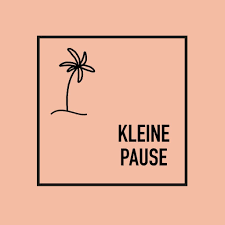


### Klassifikationsmodelle


Die Daten, die wir uns gerade angeschaut haben sind PatientInnen die in der Vergangenheit einen Tumor gehabt haben. Jetzt wollen wir herausfinden ob wir diese Daten nutzen können um auch für andere PatientInnen sagen zu können ob ihr Tumor gutartig oder bösartig ist. Lasse den *Preparation Teil* gern zugeklappt und führe ihn aus. Hier bereiten wir alle Daten vor die wir später benötigen.
Ein Schritt, der hier durchgeführt wird, ist zum Beispiel, dass die Daten in ein Trainingset und ein Testset unterteilt werden, das wurde ja schon in der Präsentation besprochen.



#### Datenaufbereitung


Dafür müssen wir unseren Datensatz in einen train und test Datensatz aufteilen:

In [31]:
# train test split
feature_train, feature_test, diagnosen_train, diagnosen_test = train_test_split(feature_mean, diagnosen, stratify= diagnosen, random_state=0)

In [ ]:
feature_mean

In [23]:
# Skalier die Daten
sc = StandardScaler()
feature_train_scaled = sc.fit_transform(feature_train)
feature_test_scaled = sc.transform(feature_test)


#### Model Training

Es gibt verschiedene Modelle, die nun die Diagnose stellen können. Wir wollen nun 3 von diesen vergleichen um festzustellen welche am Besten funktionieren:
- Decision Trees
- Random Forest
- Logistic Regression

In [24]:
# Model 1: Decision Tree
dt = DecisionTreeClassifier(max_depth = 2, random_state = 0)

dt.fit(feature_train_scaled, diagnosen_train)

dt_vorhersagen = dt.predict(feature_test_scaled)

In der folgenden Zelle werden wir einen Entscheidungsbaum zeichnen und die Eigenschaften und uns ansehen welche Eigenschaften wichtig sind. Welche Eigenschaften sind im Entscheidungsbaum wichtig und wie groß dürfen sie sein?

In [ ]:
plot_tree(dt)

In [ ]:
print(f'Feature with index 7: {feature_mean.columns[7]}')
print(f'Feature with index 0: {feature_mean.columns[0]}')
print(f'Feature with index 1: {feature_mean.columns[1]}')

Wir definieren auch die anderen beiden Modelle: Random Forest und Logistic Regression. Führe hierfür die unteren beiden Zellen aus:

In [27]:
# Model 2: Random Forest
rf = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 0)

rf.fit(feature_train_scaled, diagnosen_train)

rf_vorhersagen = rf.predict(feature_test_scaled)

In [28]:
# Model 3: Logistic Regression
lr = LogisticRegression()

lr.fit(feature_train_scaled, diagnosen_train)

lr_vorhersagen = lr.predict(feature_test_scaled)

#### Model Evaluation

Jetzt können wir die Modelle vergleichen. Dafür visualisieren wir für jedes Modell eine sogenannte *Confusion Matrix*. Wie viele bösartige Tumore wurden mit den *Decision Tree* richtig erkannt? Wie viele gutartige? Wie vielen PatientInnen mit bösartigen Tumor wurde ein gutartiger Tumor diagnostiziert? Führe auch die anderen Zellen aus um für die anderen beiden Modelle die Confusion Matrix zu sehen.

In [ ]:
# Model 1: Decision Tree
dt_cm = confusion_matrix(diagnosen_test, dt_vorhersagen)
disp = ConfusionMatrixDisplay(confusion_matrix = dt_cm,display_labels=dt.classes_)
disp.plot()
plt.show()

dt_accuracy = accuracy_score(diagnosen_test, dt_vorhersagen)
print(f'Accuracy decision tree: {dt_accuracy*100:.2f}%')

In [ ]:
# Model 2: Random Forest
rf_cm = confusion_matrix(diagnosen_test, rf_vorhersagen)
disp = ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels=rf.classes_)
disp.plot()
plt.show()

rf_accuracy = accuracy_score(diagnosen_test, rf_vorhersagen)
print(f'Accuracy random forest: {rf_accuracy*100:.2f}%')

In [ ]:
# Model 3: Logistic Regression
lr_cm = confusion_matrix(diagnosen_test, lr_vorhersagen)
disp = ConfusionMatrixDisplay(confusion_matrix = lr_cm,display_labels=lr.classes_)
disp.plot()
plt.show()

lr_accuracy = accuracy_score(diagnosen_test, lr_vorhersagen)
print(f'Accuracy logistic regression: {lr_accuracy*100:.2f}%')

Welches ist das beste Modell basierend auf der *Accuracy*? Füge 'lr', 'dt' oder 'rf' in die untenstehende Zelle ein.

In [35]:
#TODO füge bestes Modell ein
best_model = '' # 'dt', 'lr', 'rf'

**Stop! Sehr gut, du hast den dritten Teil erfolgreich beendet. Jetzt gehts erstmal mit ein paar Folien weiter.**

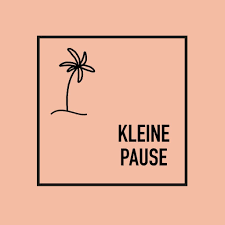

### Diagnose unserer Patientinnen

Jetzt wollen wir unser trainiertes Modell in der Praxis anwenden. Bei Anna sind alle notwendigen Messwerte bereits vorhanden. Kannst du für sie die Wahrscheinlichkeit berechnen, dass ihr Tumor bösartig ist?

In [36]:
name_patient1 = 'Anna'
patient1 = pd.DataFrame({'mean radius': [15],
                         'mean texture': [1],
                         'mean perimeter': [20],
                         'mean area': [1500],
                         'mean smoothness': [0.2],
                         'mean compactness': [0.01],
                         'mean concavity': [0.2],
                         'mean concave points': [0.11],
                         'mean symmetry': [0.1],
                         'mean fractal dimension': [0.08]
                         })

In [37]:
# Datenaufbereitung: Skalieren
patient1_skaliert = sc.transform(patient1)

In [38]:
if best_model == 'dt':
  patient1_proba = dt.predict_proba(patient1_skaliert)
elif best_model == 'rf':
  patient1_proba = rf.predict_proba(patient1_skaliert)
else:
  patient1_proba = lr.predict_proba(patient1_skaliert)

In [ ]:
print(f'{name_patient1} hat mit {patient1_proba[0][0]*100:.2f}% Wahrscheinlichkeit einen bösartigen Tumor')

Anhand der ausgegebenen Wahrscheinlichkeit des Machine Learing Modells, kann die behandelnde Ärztin weitere Tests veranlassen!

Bei Marie fehlen einige Angaben. Kannst du sie aus ihrem Steckbrief auffüllen?

---



In [ ]:
name_patient2 = 'Marie'
patient2 = pd.DataFrame({'mean radius': [],
                         'mean texture': [0.124],
                         'mean perimeter': [],
                         'mean area': [],
                         'mean smoothness': [0.05],
                         'mean compactness': [0.007],
                         'mean concavity': [0.234],
                         'mean concave points': [],
                         'mean symmetry': [],
                         'mean fractal dimension': [0.02]
                         })

In [ ]:
# preparation: skalieren
# Skalier die Daten
patient2_skaliert = sc.transform(patient2)

In [ ]:
if best_model == 'dt':
  patient2_proba = dt.predict_proba(patient2_skaliert)
elif best_model == 'rf':
  patient2_proba = rf.predict_proba(patient2_skaliert)
else:
  patient2_proba = lr.predict_proba(patient2_skaliert)

In [ ]:
print(f'{name_patient2} hat mit {patient2_proba[0][0]*100:.2f}% Wahrscheinlichkeit einen bösartigen Tumor')

Was würdest du ihrem Arzt raten?

Du bist neugierig und möchtest einmal spielerisch die Ergebnisse des Algorithmus erforschen. Kannst du eine fiktive PatientIn generieren, bei der die Wahrscheinlichkeit für einen bösartigen Tumor bei ungefähr 75% liegt?
Wir haben den Code so weit vorbereitet, dass du nur noch die Werte einfügen musst und die darauffolgenden Codezeilen laufen lassen muss. **Achtung**: Vergiss nicht, dass du folgenden vier Codefelder bei **jeder Änderung** der Daten noch einmal durchlaufen lassen musst.   


In [ ]:
name_patient3 = 'Fiktive_PatientIn'
patient3 = pd.DataFrame({'mean radius': [],
                         'mean texture': [],
                         'mean perimeter': [],
                         'mean area': [],
                         'mean smoothness': [],
                         'mean compactness': [],
                         'mean concavity': [],
                         'mean concave points': [],
                         'mean symmetry': [],
                         'mean fractal dimension': []
                         })

In [ ]:
# preparation: skalieren
# Skalier die Daten
patient3_skaliert = sc.transform(patient3)

In [ ]:
if best_model == 'dt':
  patient3_proba = dt.predict_proba(patient3_skaliert)
elif best_model == 'rf':
  patient3_proba = rf.predict_proba(patient3_skaliert)
else:
  patient3_proba = lr.predict_proba(patient3_skaliert)

In [ ]:
print(f'{name_patient3} hat mit {patient3_proba[0][0]*100:.2f}% Wahrscheinlichkeit einen bösartigen Tumor')

**Sehr gut! Du bist am Ende des Workshops angekommen! Jetzt geht es nochmal kurz mit ein paar Abschlussfolien weiter.**

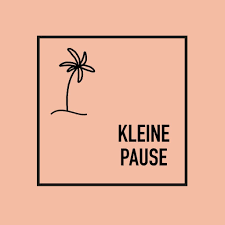

### Extra: Welche Feature waren besonders wichtig für die Entscheidung der Modelle?

Wenn du besonders schnell mit den vorherigen Aufgaben warst, kannst du dir noch ansehen, welche unserer Feature besonders wichtig für die Entscheidung der einzelnen Modelle war. Das ist eine weitere Anwendung, wie KI in der medizinischen Forschung eingesetzt werden kann. KI kann den ForscherInnen helfen die Krankheit besser zu verstehen.

In [ ]:
dt_feature_importance = pd.DataFrame({'Feature': feature_mean.columns, 'Importance': np.abs(dt.feature_importances_)})
dt_feature_importance = dt_feature_importance.sort_values('Importance', ascending=True)
dt_feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [ ]:
rf_feature_importance = pd.DataFrame({'Feature': feature_mean.columns, 'Importance': np.abs(rf.feature_importances_)})
rf_feature_importance = rf_feature_importance.sort_values('Importance', ascending=True)
rf_feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [ ]:
coefficients = lr.coef_[0]

feature_importance = pd.DataFrame({'Feature': feature_mean.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))